In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import xarray as xr

from pathlib import Path

HERE = Path().cwd()
BAPSF_MOTION = (HERE / ".." / ".." / ".." / "src").resolve()
sys.path.append(str(BAPSF_MOTION))

plt.rcParams.update(
    {
        # "figure.figsize": [12, 0.56 * 12],
        "figure.figsize": [10, 0.8 * 10],
        "font.size": 16,
    }
)

In [2]:
from bapsf_motion.motion_list.exclusions import CircularExclusion

## LaPD Exclusion in XY

Create the seeding boolean mask.  In the boolean mask a `True` value indicates a point allowed for a motion list and a `False` value indicaes an exclusion zone.

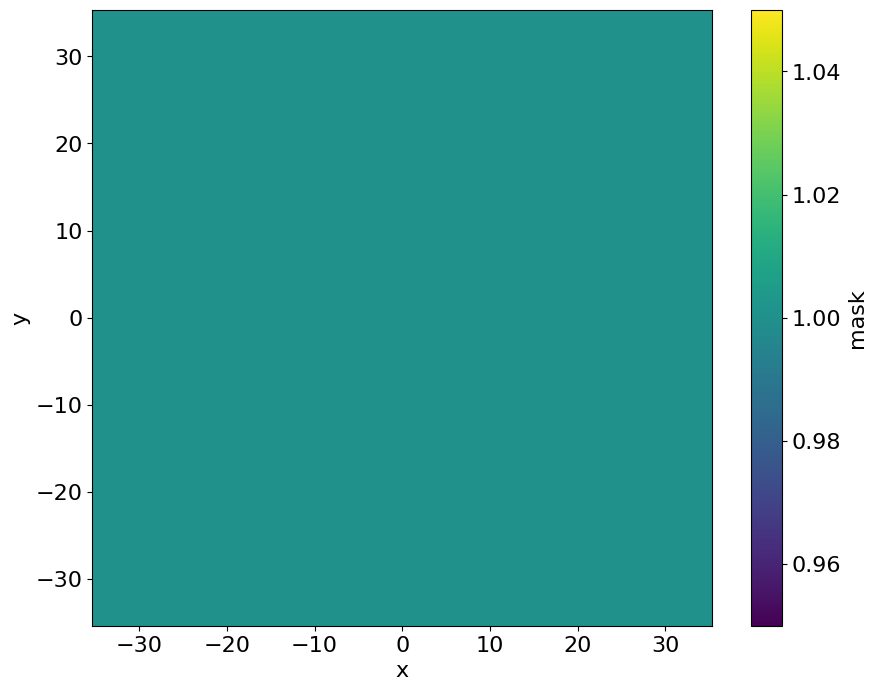

In [3]:
size = 100
side = np.linspace(-35, 35, num=size)
ds = xr.Dataset(
    {"mask": (("x", "y"), np.ones((size, size), dtype=bool))},
    coords={
        "x": side,
        "y": side,
    },
)

ds.mask.plot(x="x", y="y")

Add a circular XY exclusion that simulates the LaPD inner diameter

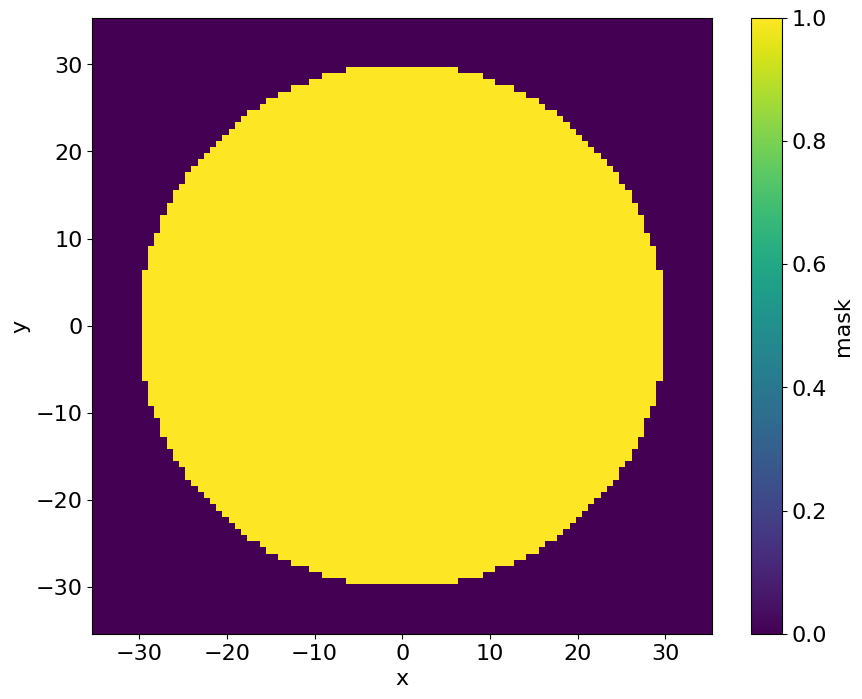

In [4]:
ex1 = CircularExclusion(ds, radius=30)
ds["mask"].plot(x="x", y="y");

Note that `CircularExclusion` updates the overall mask and stores it's exclusion later into the `xarray.Dataset` as `mask_ex1`.

In [5]:
ds

<xarray.Dataset>
Dimensions:   (x: 100, y: 100)
Coordinates:
  * x         (x) float64 -35.0 -34.29 -33.59 -32.88 ... 32.88 33.59 34.29 35.0
  * y         (y) float64 -35.0 -34.29 -33.59 -32.88 ... 32.88 33.59 34.29 35.0
Data variables:
    mask      (x, y) bool False False False False ... False False False False
    mask_ex1  (x, y) bool False False False False ... False False False False

We can check if a specific point is considered excluded or not.

In [6]:
(
    ex1.is_excluded((0, 0)),
    ex1.is_excluded((-30, 30)),
)

(False, True)

## Let's add a 2nd Circular Exclusion

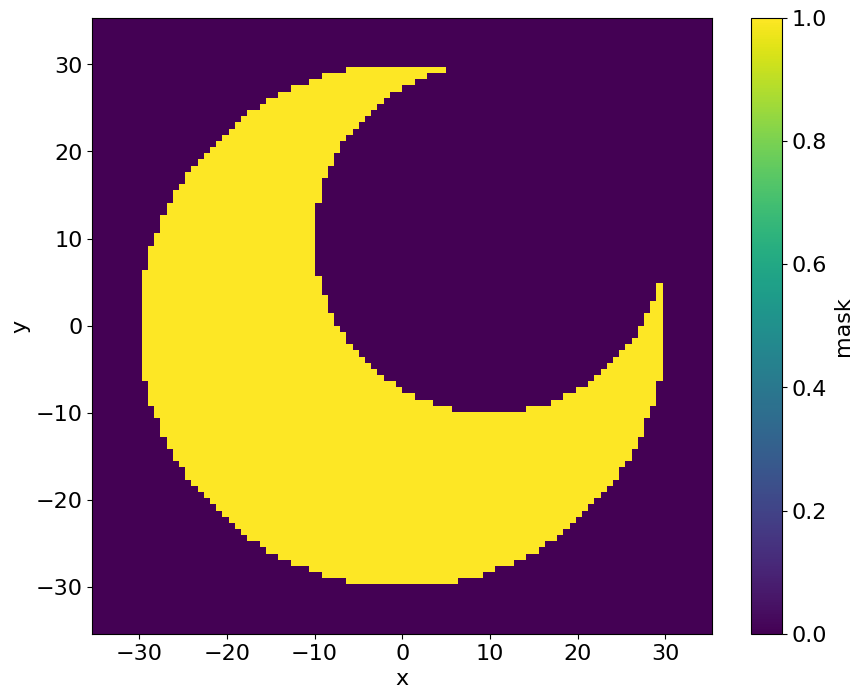

In [7]:
ex2 = CircularExclusion(ds, radius=20, center=(10.0, 10.0), exclude="inside")
ds["mask"].plot(x="x", y="y");

Now both exclusion layers are stored in the `Dataset`.

In [8]:
ds

<xarray.Dataset>
Dimensions:   (x: 100, y: 100)
Coordinates:
  * x         (x) float64 -35.0 -34.29 -33.59 -32.88 ... 32.88 33.59 34.29 35.0
  * y         (y) float64 -35.0 -34.29 -33.59 -32.88 ... 32.88 33.59 34.29 35.0
Data variables:
    mask      (x, y) bool False False False False ... False False False False
    mask_ex1  (x, y) bool False False False False ... False False False False
    mask_ex2  (x, y) bool True True True True True ... True True True True True

Note that the `is_exclusion()` function only checks for exclusion from the class instance the point is being checked to.  The exclusion evalution is done by the overall `MotionList` class.  Please refer to the `MotionList` notebook for further details.

In [9]:
(
    ex1.is_excluded((0, 0)),
    ex2.is_excluded((0, 0)),
)

(False, True)